In [25]:
# from google.colab import drive
# drive.mount('/content/drive')

In [26]:
# cd /content/drive/MyDrive/KHDL

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from numpy import NaN

In [28]:
dataset = pd.read_csv('/home/binbin/University/semester2_2122/Data_Science/Ck/rawData.csv',on_bad_lines='skip')

Xem xét tổng quan dữ liệu 

In [29]:
dataset.head()

,title,address,area,price,number_bedroom,number_wc,number_floor,direction,entrance,facade,number_parking,id_estate
0,Căn hộ nghỉ dưỡng ngay trung tâm hà nội chỉ 1 ...,"Vinhomes Smart City, Phường Trung Văn, Quận Na...",30.0,1.25,1.0,1.0,27.0,Đông bắc,30.0,30.0,3.0,3947348
1,Căn 2 pn full nội thất view hồ 10ha. công viên...,"Vinhomes Smart City, Phường Cầu Diễn, Quận Nam...",55.0,2.1,2.0,1.0,20.0,Đông bắc,50.0,5.0,3.0,3947371
2,"Duy nhất căn 2 ngủ tầng đẹp giá 1 tỷ 779triệu,...","Tecco Diamond, Xã Tứ Hiệp, Huyện Thanh Trì, Hà...",65.0,1.7,2.0,2.0,NaN,NaN,NaN,NaN,1.0,3946737
3,Nhận nhà ở ngay không lo trả lãi tại teccodiam...,"Tecco Diamond, Thị Trấn Văn Điển, Huyện Thanh ...",69.0,1.93,2.0,2.0,NaN,NaN,NaN,NaN,1.0,3946177
4,Chính chủ bán căn hộ chung cư citadines centra...,"Citadines Bình Dương, Phường An Thạnh, Thị Xã ...",114.0,3.05,3.0,2.0,16.0,NaN,50.0,NaN,NaN,3944714


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2677 entries, 0 to 2676
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2677 non-null   object 
 1   address         2677 non-null   object 
 2   area            2677 non-null   float64
 3   price           2677 non-null   object 
 4   number_bedroom  2306 non-null   float64
 5   number_wc       2261 non-null   float64
 6   number_floor    1220 non-null   float64
 7   direction       1197 non-null   object 
 8   entrance        737 non-null    float64
 9   facade          542 non-null    float64
 10  number_parking  1101 non-null   float64
 11  id_estate       2677 non-null   int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 251.1+ KB


Làm sạch dữ liệu 

,Total,Percent
facade,2135,0.797535
entrance,1940,0.724692
number_parking,1576,0.588719
direction,1480,0.552858
number_floor,1457,0.544266


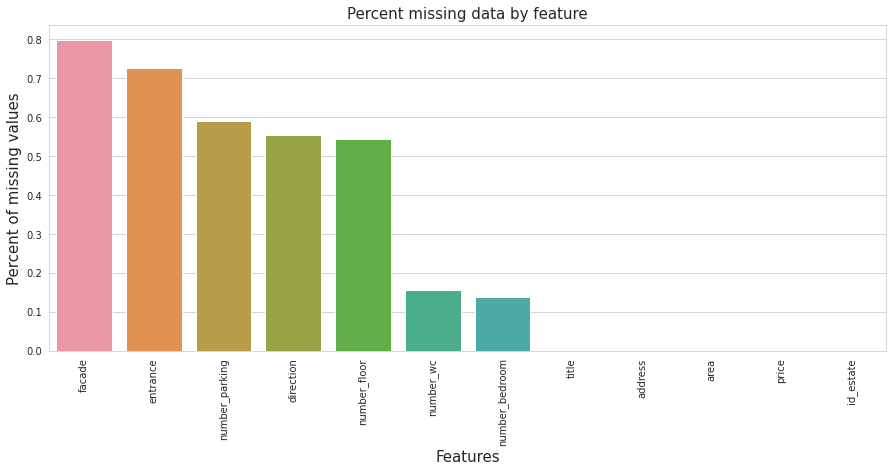

In [31]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [32]:
dataset.replace({NaN:-9999})

,title,address,area,price,number_bedroom,number_wc,number_floor,direction,entrance,facade,number_parking,id_estate
0,Căn hộ nghỉ dưỡng ngay trung tâm hà nội chỉ 1 ...,"Vinhomes Smart City, Phường Trung Văn, Quận Na...",30.0,1.25,1.0,1.0,27.0,Đông bắc,30.0,30.0,3.0,3947348
1,Căn 2 pn full nội thất view hồ 10ha. công viên...,"Vinhomes Smart City, Phường Cầu Diễn, Quận Nam...",55.0,2.1,2.0,1.0,20.0,Đông bắc,50.0,5.0,3.0,3947371
2,"Duy nhất căn 2 ngủ tầng đẹp giá 1 tỷ 779triệu,...","Tecco Diamond, Xã Tứ Hiệp, Huyện Thanh Trì, Hà...",65.0,1.7,2.0,2.0,-9999.0,-9999,-9999.0,-9999.0,1.0,3946737
3,Nhận nhà ở ngay không lo trả lãi tại teccodiam...,"Tecco Diamond, Thị Trấn Văn Điển, Huyện Thanh ...",69.0,1.93,2.0,2.0,-9999.0,-9999,-9999.0,-9999.0,1.0,3946177
4,Chính chủ bán căn hộ chung cư citadines centra...,"Citadines Bình Dương, Phường An Thạnh, Thị Xã ...",114.0,3.05,3.0,2.0,16.0,-9999,50.0,-9999.0,-9999.0,3944714
...,...,...,...,...,...,...,...,...,...,...,...,...
2672,"Mở bán căn hộ tttp.thuận an, giá 896 triêu/căn...","Legacy Central, Thị Xã Thuận An, Bình Dương",42.0,0.896,1.0,1.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,3931551
2673,"48m2 bàn giao 1pn có thể tự ngăn thành 2pn, ch...","Căn hộ Vista Riverside, Thị Xã Thuận An, Bình ...",48.0,1.2,1.0,1.0,10.0,-9999,-9999.0,-9999.0,-9999.0,3931239
2674,Sắp mở bán dự án căn hộ thuận an - giá gốc đầu...,"Legacy Central, Thị Xã Thuận An, Bình Dương",33.0,0.8,1.0,1.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,3932155
2675,Căn hộ độc tôn ngay tp.thuận an cạnh aeon mall...,"Legacy Central, Thị Xã Thuận An, Bình Dương",32.0,0.8,1.0,1.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,3918708


In [33]:
dataset.dropna()

,title,address,area,price,number_bedroom,number_wc,number_floor,direction,entrance,facade,number_parking,id_estate
0,Căn hộ nghỉ dưỡng ngay trung tâm hà nội chỉ 1 ...,"Vinhomes Smart City, Phường Trung Văn, Quận Na...",30.0,1.25,1.0,1.0,27.0,Đông bắc,30.0,30.0,3.0,3947348
1,Căn 2 pn full nội thất view hồ 10ha. công viên...,"Vinhomes Smart City, Phường Cầu Diễn, Quận Nam...",55.0,2.1,2.0,1.0,20.0,Đông bắc,50.0,5.0,3.0,3947371
10,Nhanh tay sở hữu ngay 200 căn hộ view hồ đẹp n...,"Phường Văn Quán, Quận Hà Đông, Hà Nội",86.0,3.5,2.0,2.0,45.0,Đông bắc,10.0,5.0,1.0,3949242
50,Westgate mua nhà dễ hơn thuê nhà - thanh toán ...,"West Gate Park, Thị Trấn Tân Túc, Huyện Bình C...",60.0,2.4,2.0,2.0,8.0,Đông nam,50.0,50.0,3.0,3944639
51,Sky89 110m2 3pn căn góc 2 view sông - giỏ hàng...,"Căn hộ Sky 89, Phường Bình Thuận, Quận 7, TP HCM",110.0,5.6,3.0,1.0,8.0,Đông,60.0,60.0,3.0,3944645
...,...,...,...,...,...,...,...,...,...,...,...,...
2662,"Bán gấp căn hộ quận 6 sắp nhận nhà chỉ 1,35 tỷ...","Căn hộ Lucky Palace, Quận 6, TP HCM",49.0,1.35,2.0,1.0,12.0,Tây,32.0,32.0,2.0,3735019
2666,Duy nhất (1) căn 62m2. tt 310 nhận nhà. ck nga...,"Tecco Home, Thị Xã Thuận An, Bình Dương",62.0,1,2.0,2.0,22.0,Tây,743.0,4.0,2.0,3932933
2669,Căn hộ biên hòa giá rẻ chiết khấu khủng thanh ...,"KĐT Biên Hoà, TP Biên Hòa, Đồng Nai",68.0,0.35,2.0,2.0,29.0,Đông nam,60.0,60.0,1.0,3857108
2670,Căn hộ biên hòa của tập đoàn hưng thịnh chiết ...,"KĐT Biên Hoà, TP Biên Hòa, Đồng Nai",66.0,2,2.0,2.0,29.0,Đông nam,60.0,60.0,1.0,3857127


In [34]:
dataset

,title,address,area,price,number_bedroom,number_wc,number_floor,direction,entrance,facade,number_parking,id_estate
0,Căn hộ nghỉ dưỡng ngay trung tâm hà nội chỉ 1 ...,"Vinhomes Smart City, Phường Trung Văn, Quận Na...",30.0,1.25,1.0,1.0,27.0,Đông bắc,30.0,30.0,3.0,3947348
1,Căn 2 pn full nội thất view hồ 10ha. công viên...,"Vinhomes Smart City, Phường Cầu Diễn, Quận Nam...",55.0,2.1,2.0,1.0,20.0,Đông bắc,50.0,5.0,3.0,3947371
2,"Duy nhất căn 2 ngủ tầng đẹp giá 1 tỷ 779triệu,...","Tecco Diamond, Xã Tứ Hiệp, Huyện Thanh Trì, Hà...",65.0,1.7,2.0,2.0,NaN,NaN,NaN,NaN,1.0,3946737
3,Nhận nhà ở ngay không lo trả lãi tại teccodiam...,"Tecco Diamond, Thị Trấn Văn Điển, Huyện Thanh ...",69.0,1.93,2.0,2.0,NaN,NaN,NaN,NaN,1.0,3946177
4,Chính chủ bán căn hộ chung cư citadines centra...,"Citadines Bình Dương, Phường An Thạnh, Thị Xã ...",114.0,3.05,3.0,2.0,16.0,NaN,50.0,NaN,NaN,3944714
...,...,...,...,...,...,...,...,...,...,...,...,...
2672,"Mở bán căn hộ tttp.thuận an, giá 896 triêu/căn...","Legacy Central, Thị Xã Thuận An, Bình Dương",42.0,0.896,1.0,1.0,NaN,NaN,NaN,NaN,NaN,3931551
2673,"48m2 bàn giao 1pn có thể tự ngăn thành 2pn, ch...","Căn hộ Vista Riverside, Thị Xã Thuận An, Bình ...",48.0,1.2,1.0,1.0,10.0,NaN,NaN,NaN,NaN,3931239
2674,Sắp mở bán dự án căn hộ thuận an - giá gốc đầu...,"Legacy Central, Thị Xã Thuận An, Bình Dương",33.0,0.8,1.0,1.0,NaN,NaN,NaN,NaN,NaN,3932155
2675,Căn hộ độc tôn ngay tp.thuận an cạnh aeon mall...,"Legacy Central, Thị Xã Thuận An, Bình Dương",32.0,0.8,1.0,1.0,NaN,NaN,NaN,NaN,NaN,3918708


Xem trực quan vể dữ liệu phân bố bằng Seaborn

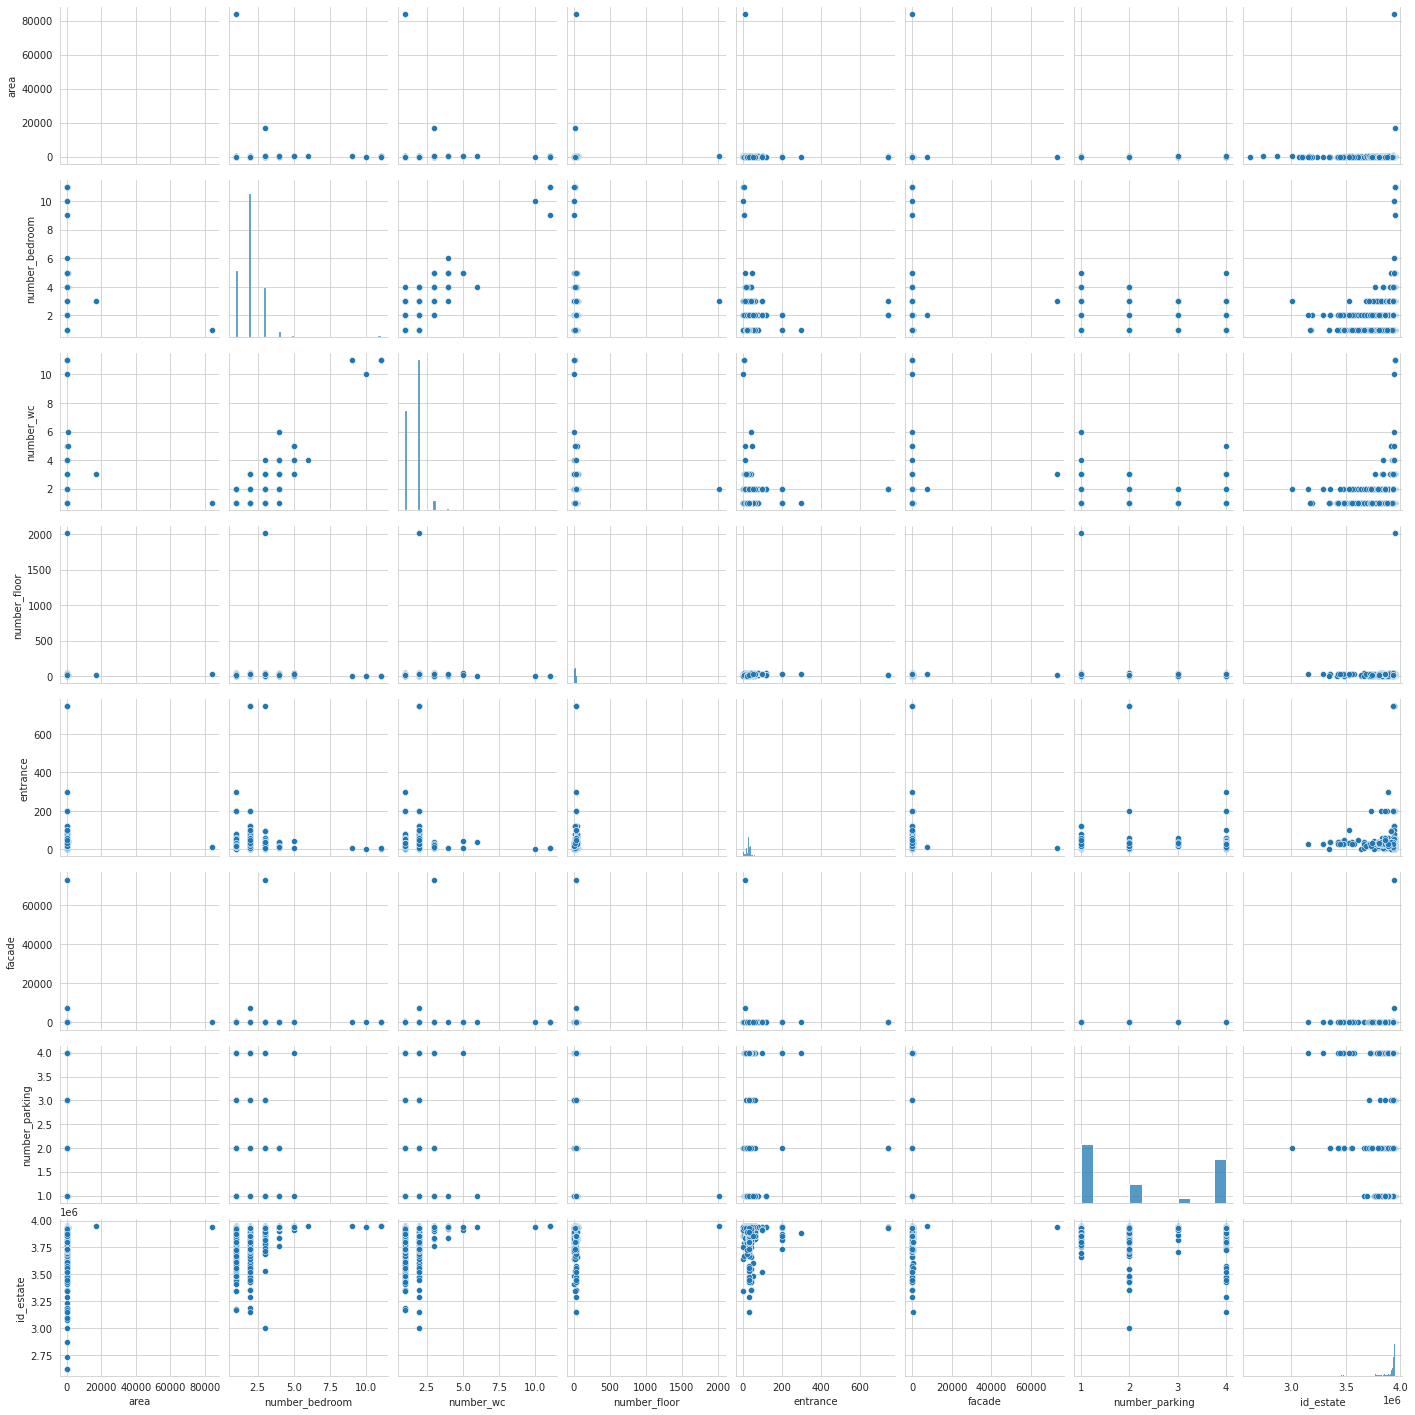

In [35]:
sns.pairplot(dataset)

/home/binbin/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'Thỏa thuận'

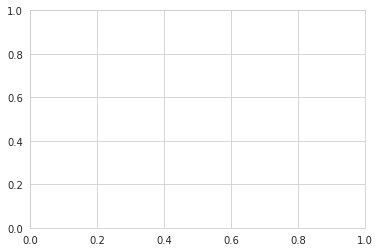

In [36]:
sns.set_style("whitegrid")
sns.distplot(dataset['price'], kde = False, rug = "True")

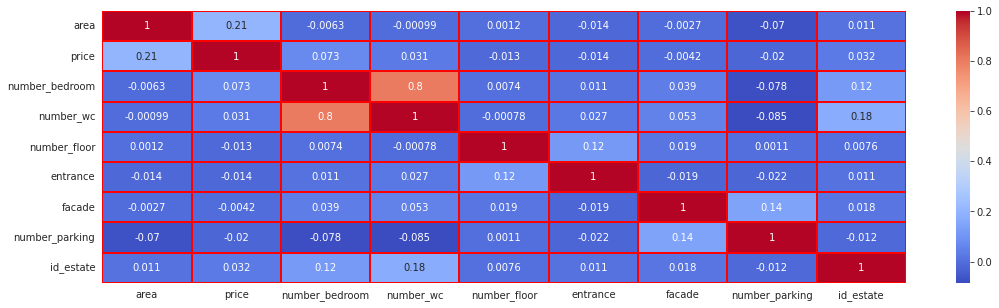

In [ ]:
plt.figure(figsize=(18,5))
sns.heatmap(dataset.corr(), annot=True, lw = 1, linecolor="r",cmap="coolwarm")